# TensorFlow 2.0

In [ ]:
from glob import glob

import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets 

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Hyperparameter Tunning

In [3]:
num_epochs = 10
batch_size = 32

learning_rate = 0.001

dropout_rate = 0.5

input_shape = (32, 32, 3)
num_classes = 10

## Build Model

In [4]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [5]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  # Optimization
              loss='categorical_crossentropy',  # Loss Function 
              metrics=['accuracy'])  # Metrics / Accuracy

# Data Preprocess

In [8]:
# 압축 풀기
!unzip -qq /content/drive/"My Drive"/"[AOP:딥러닝 인공지능]"/TEST/"1. [Tensorflow 2.0 과 Pytorch]"/"3. 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch"/"3. dataset"/cifar.zip


replace cifar/labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
train_paths=glob('/content/cifar/train/*.png')
train_paths.sort()
test_paths=glob('/content/cifar/test/*.png')
test_paths.sort()
train_paths[0]
test_paths[0]

'/content/cifar/test/0_cat.png'

In [9]:
path = train_paths[0]
path

'/content/cifar/train/0_frog.png'

In [10]:
def get_class_name(path):
  fname = tf.strings.split(path, '_')[-1]
  lbl_name = tf.strings.regex_replace(fname,'.png','')
  return lbl_name

In [11]:
class_names = [get_class_name(path) for path in train_paths]
class_names[:10]

[<tf.Tensor: shape=(), dtype=string, numpy=b'frog'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'automobile'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'frog'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'frog'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'ship'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'ship'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'cat'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'deer'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'frog'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'airplane'>]

In [12]:
tf.unique(class_names).y.numpy() # tf.unique(class_names)의 결과값(y) 중 numpy 부분만 출력

array([b'frog', b'automobile', b'ship', b'cat', b'deer', b'airplane',
       b'truck', b'dog', b'bird', b'horse'], dtype=object)

In [13]:
classes = tf.unique(class_names).y.numpy()
classes

array([b'frog', b'automobile', b'ship', b'cat', b'deer', b'airplane',
       b'truck', b'dog', b'bird', b'horse'], dtype=object)

In [14]:
classes == get_class_name(path) #원핫인코딩 테스트

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True, False, False, False, False, False, False, False, False,
       False])>

In [15]:
tf.cast(classes==get_class_name(path), tf.uint8) #tf.cast

<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)>

In [16]:
onehot_encoding = tf.cast(classes==get_class_name(path), tf.uint8)

In [17]:
# 원핫인코딩 함수로 만들어보자.
def onehot_encoding(label_name):
  classes == get_class_name(path)
  onehot_encoding = tf.cast(classes==get_class_name(path), tf.uint8)
  return onehot_encoding

In [25]:
# 이미지 읽어오는 것부터 원핫인코딩까지 한번에 하는 함수를 만들어보자
def read_dataset(path):
  #read image
  gfile = tf.io.read_file(path)
  image = tf.io.decode_image(gfile)
  image = tf.cast(image, tf.float32) / 255. #nomalization

  #read label
  class_name = get_class_name(path) # 위에서 만든 레이블(텍스트) 추출 함수 사용
  label = onehot_encoding(class_name) # 위에서 만든 원핫인코딩(텍스트레이블->숫자) 함수 사용
  return image, label #path 하나를 입력받고, image와 label 두 변수를 반환

In [19]:
image, label = read_dataset(path)
image.shape, label.shape

(TensorShape([32, 32, 3]), TensorShape([10]))

In [22]:
def image_preprocess(image,label): 
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_flip_up_down(image)
  return image, label

In [23]:
# image_preprocess test
transformed, label = image_preprocess(image,label)
transformed.shape

TensorShape([32, 32, 3])

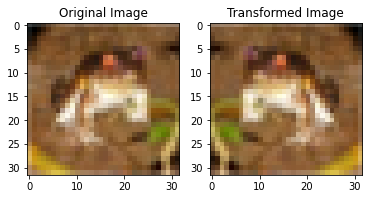

In [24]:
# image_preprocess test
plt.subplot(121)
plt.title('Original Image')
plt.imshow(image)

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(transformed)
plt.show()

In [28]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_paths)
train_dataset = train_dataset.map(read_dataset)
train_dataset = train_dataset.map(image_preprocess) #trainsform images
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.shuffle(buffer_size=len(train_paths))
train_dataset = train_dataset.repeat()

In [30]:
test_dataset = tf.data.Dataset.from_tensor_slices(test_paths)
test_dataset = test_dataset.map(read_dataset)
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.shuffle(buffer_size=len(test_paths))
test_dataset = test_dataset.repeat()

## Training

In [33]:
len(train_paths), len(test_paths)


(50000, 10000)

In [35]:
steps_per_epoch=len(train_paths)//batch_size
validation_steps = len(test_paths)//batch_size

In [36]:
model.fit_generator(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_dataset,
    validation_steps=validation_steps,
    epochs=num_epochs
    )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10


KeyboardInterrupt: ignored